In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS


plt.style.use("ggplot")
sns.set_theme()
pd.set_option("display.max_columns",None)

## Chargement du dataset et appercu general

In [3]:
#charge le dataset
df = pd.read_csv("netflix_titles.csv")

print("Shape (lignes,colonnes) :",df.shape)
display(df.head())

df.info()

df.describe(include="all").T

Shape (lignes,colonnes) : (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Valeurs manquantes et doublons

In [4]:
#Valeurs manquantes par colonnes
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
#pourcentage de valeurs manquantes par colonnes
(df.isna().mean()*100).round(2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

In [6]:
#Doublons
print("Nombres de lignes dupliquee :",df.duplicated().sum())

Nombres de lignes dupliquee : 0


## Nettoyage

In [ ]:
#S'occupe des dates pas formatte pareill.
#Split en 2 colonnes; date added en datetime , year added et month added.
#transofrme aussi date_added en datetime pour faciliter les analyses
df["date_added"] = pd.to_datetime(df["date_added"],
    format="mixed"
    )
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

print(df[["date_added", "year_added", "month_added"]].head())

In [ ]:
#extrait la partie int de la duration.
df["duration_int"] = (
    df["duration"].str.extract(r"(\d+)").astype(float)
)

#visualisation et check
df[["type","duration","duration_int"]].head()

In [ ]:
display(df.head())

## analyse des contenus

### Films vs séries : proportions, tendances par année

In [45]:
#Sort le count de movie et de tv show
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

### Répartition des Movies / TV Shows

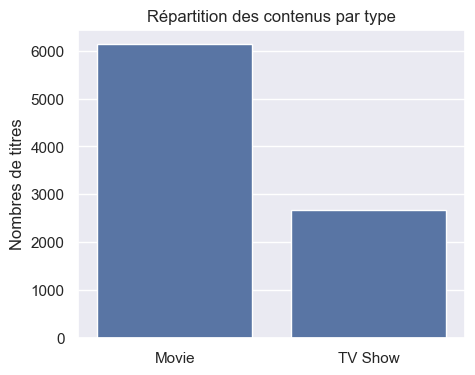

In [46]:
plt.figure(figsize=(5,4))
sns.countplot(data=df,x="type")
plt.title("Répartition des contenus par type")
plt.xlabel("")
plt.ylabel("Nombres de titres")
plt.show()

### Évolutions par années

In [47]:
type_year = (
    df
    .groupby(["release_year", "type"])
    .size()
    .reset_index(name="count")
    .sort_values("release_year")
)

display(type_year.head())

,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3


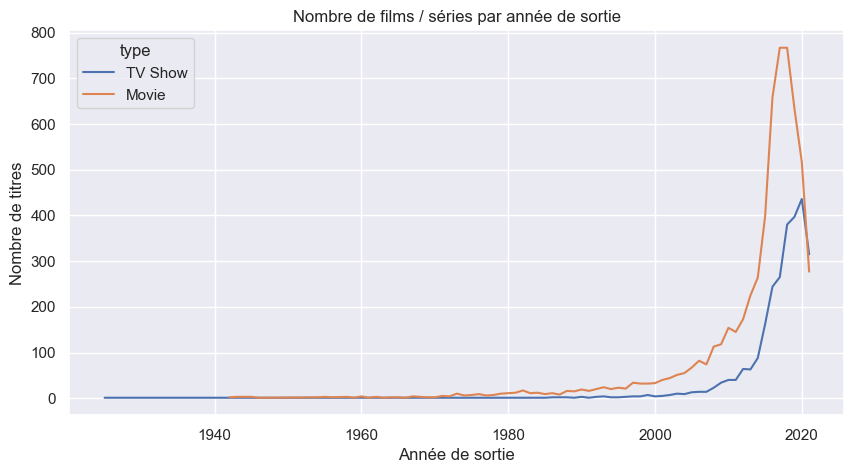

In [48]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=type_year,
    x="release_year",
    y="count",
    hue="type"
)
plt.title("Nombre de films / séries par année de sortie")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de titres")
plt.show()

### Genre principaux

In [49]:
#Exploser les genre car il sont separé par des virgules
df_genres = df[["show_id", "type", "listed_in"]].dropna().copy()

df_genres["genre"] = df_genres["listed_in"].str.split(", ")
df_genres = df_genres.explode("genre")

df_genres.head()

,show_id,type,listed_in,genre
0,s1,Movie,Documentaries,Documentaries
1,s2,TV Show,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
1,s2,TV Show,"International TV Shows, TV Dramas, TV Mysteries",TV Dramas
1,s2,TV Show,"International TV Shows, TV Dramas, TV Mysteries",TV Mysteries
2,s3,TV Show,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows


In [50]:
#Top 15 des genres toutes series et film confondu
top_genres = (
    df_genres["genre"]
    .value_counts()
    .head(15)
    .rename_axis("genre")      
    .reset_index(name="count")
)

display(top_genres)

,genre,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


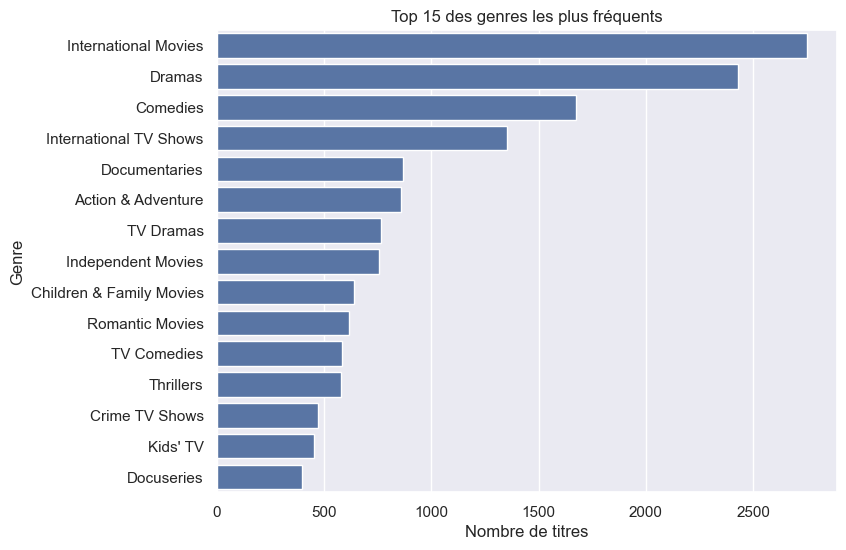

In [51]:
#plot du top 15 des genres
plt.figure(figsize=(8,6))
sns.barplot(data=top_genres, y="genre", x="count")
plt.title("Top 15 des genres les plus fréquents")
plt.xlabel("Nombre de titres")
plt.ylabel("Genre")
plt.show()

### Regroupement des genres

In [52]:
#On vas essayer de faire un regroupement
df_genres = df[["show_id", "listed_in"]].dropna().copy()
df_genres["genre"] = df_genres["listed_in"].str.split(", ")
df_genres = df_genres.explode("genre")

df_genres["genre"] = df_genres["genre"].str.strip()
df_genres.head()

,show_id,listed_in,genre
0,s1,Documentaries,Documentaries
1,s2,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
1,s2,"International TV Shows, TV Dramas, TV Mysteries",TV Dramas
1,s2,"International TV Shows, TV Dramas, TV Mysteries",TV Mysteries
2,s3,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows


In [53]:
#Essaie de regroupement par mots cle
def regrouper_genre(g):
    g_lower = g.lower()
    
    if "children" in g_lower or "family" in g_lower or "kids" in g_lower:
        return "Enfants / Famille"
    if "comed" in g_lower:
        return "Comédie"
    if "drama" in g_lower:
        return "Drame"
    if "horror" in g_lower:
        return "Horreur"
    if "action" in g_lower or "adventure" in g_lower:
        return "Action / Aventure"
    if "document" in g_lower or "docuseries" in g_lower:
        return "Documentaire"
    if "romantic" in g_lower or "romance" in g_lower:
        return "Romance"
    if "anime" in g_lower:
        return "Anime"
    if "thriller" in g_lower:
        return "Thriller"
    if "reality" in g_lower:
        return "Téléréalité"
    if "stand-up" in g_lower:
        return "Humour / Stand-up"
    if "international" in g_lower:
        return "International"
    
    return "Autre"

df_genres["genre_group"] = df_genres["genre"].apply(regrouper_genre)
df_genres[["genre", "genre_group"]].head(10)


,genre,genre_group
0,Documentaries,Documentaire
1,International TV Shows,International
1,TV Dramas,Drame
1,TV Mysteries,Autre
2,Crime TV Shows,Autre
2,International TV Shows,International
2,TV Action & Adventure,Action / Aventure
3,Docuseries,Documentaire
3,Reality TV,Téléréalité
4,International TV Shows,International


In [54]:
top_genre_groups = (
    df_genres["genre_group"]
    .value_counts()
    .rename_axis("genre_group")   
    .reset_index(name="count")    
)

display(top_genre_groups)

,genre_group,count
0,International,4103
1,Autre,3439
2,Drame,3190
3,Comédie,2654
4,Documentaire,1264
5,Enfants / Famille,1092
6,Action / Aventure,1027
7,Romance,986
8,Thriller,634
9,Horreur,432


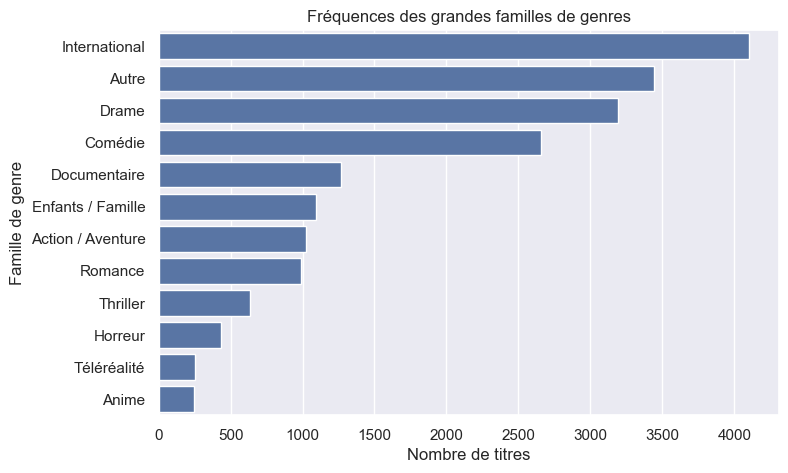

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(data=top_genre_groups, y="genre_group", x="count")
plt.title("Fréquences des grandes familles de genres")
plt.xlabel("Nombre de titres")
plt.ylabel("Famille de genre")
plt.show()

### Repartition geographique

Valeurs manquantes dans 'country': 831 (9.44%)

Nombre total de titres avec pays: 7976
Nombre total d'associations titre-pays: 10019



C:\Users\1\AppData\Local\Temp\ipykernel_24676\3620362181.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




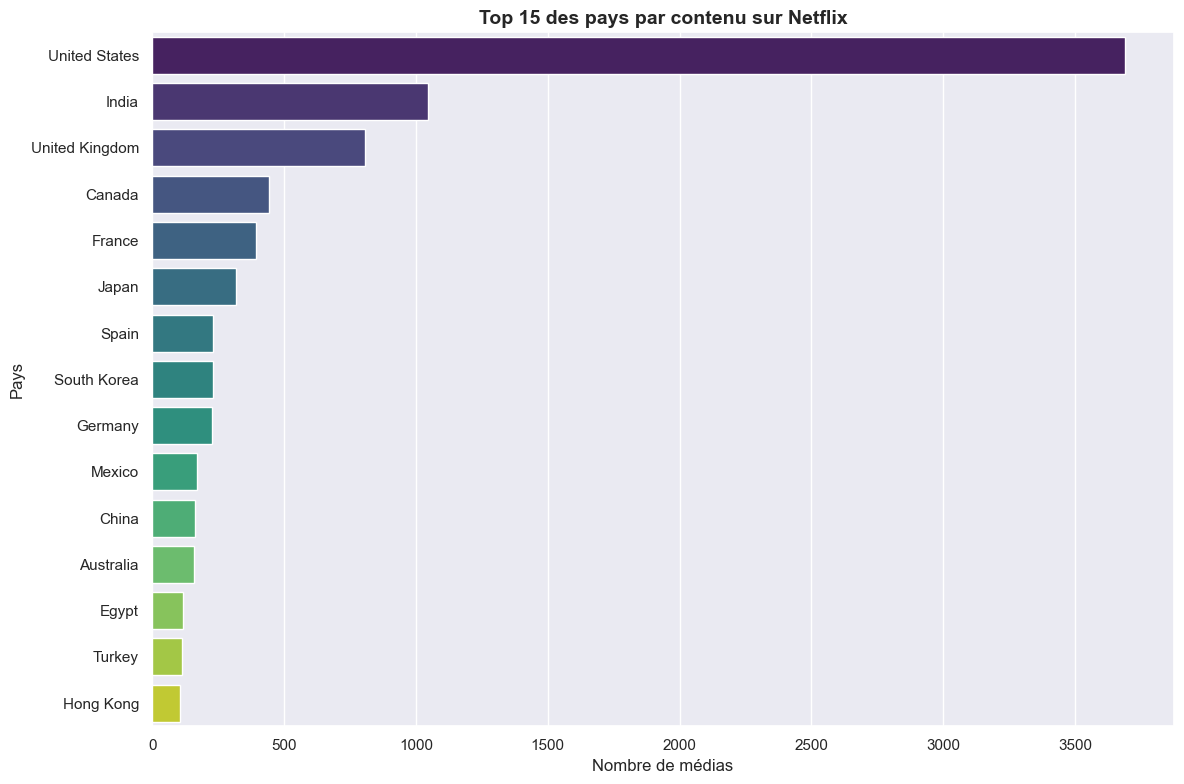

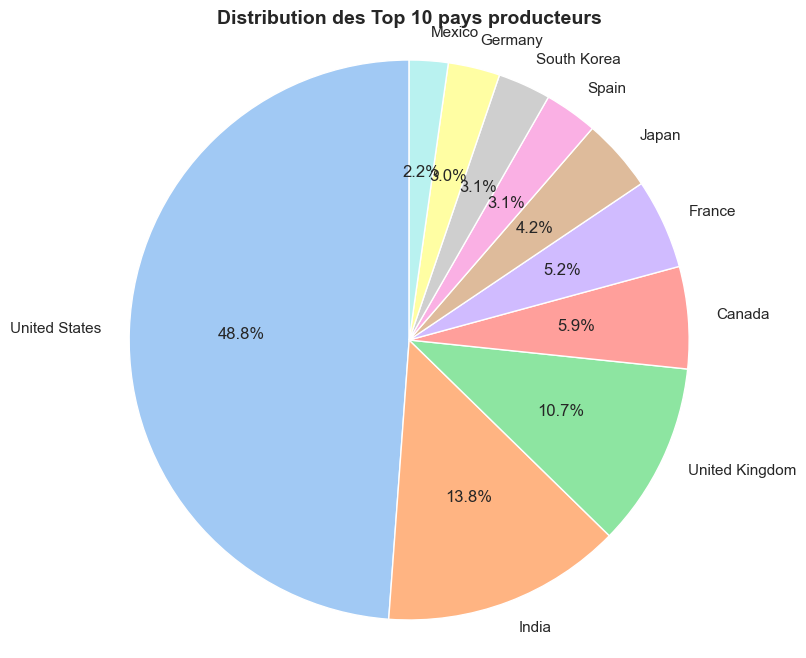

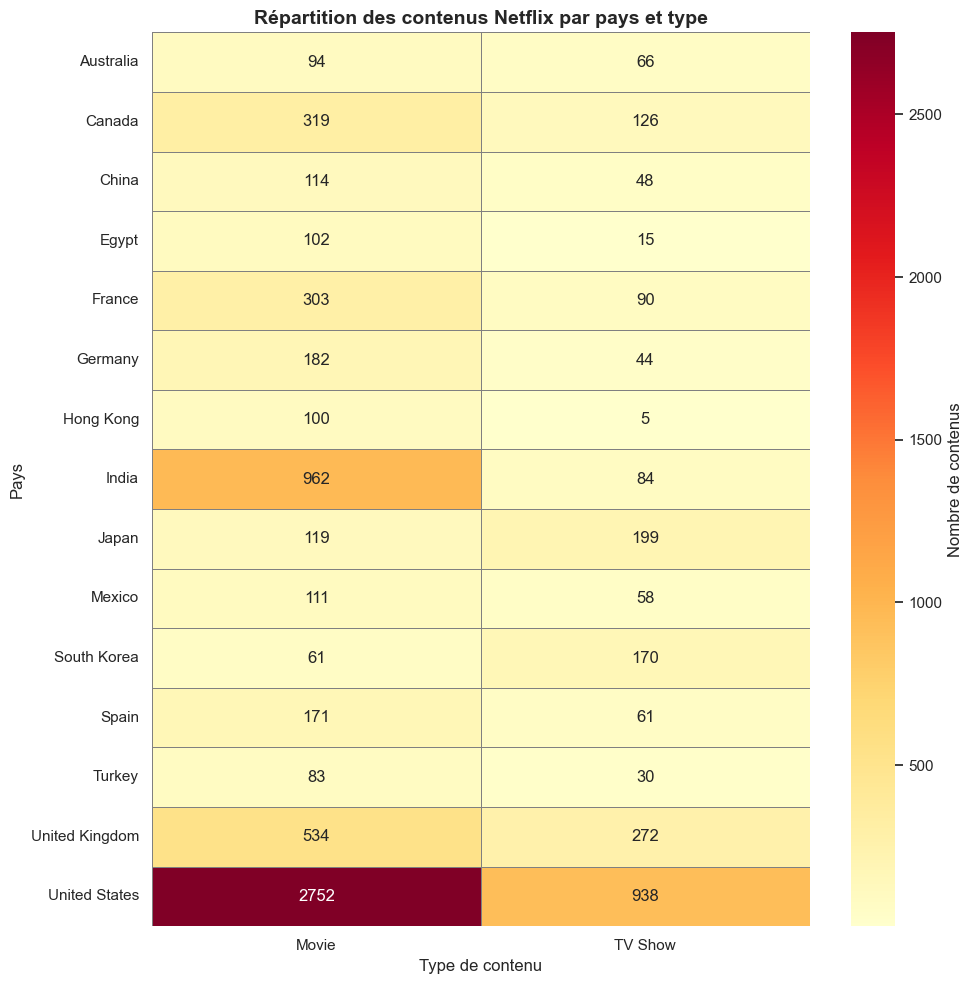

In [29]:
 #1. Compter les valeurs manquantes
print(f"Valeurs manquantes dans 'country': {df['country'].isna().sum()} ({(df['country'].isna().mean()*100):.2f}%)")
print()

# 2. Séparer les pays multiples et créer une liste de tous les pays
# Utiliser explode pour transformer chaque pays en ligne séparée
df_country = df['country'].dropna().str.split(',', expand=False)
all_countries = df_country.explode().str.strip()
print(f"Nombre total de titres avec pays: {len(df_country)}")
print(f"Nombre total d'associations titre-pays: {len(all_countries)}")
print()
country_counts = all_countries.value_counts().reset_index()
country_counts.columns = ['country', 'count']

# 1. Bar plot horizontal - Top 15 pays (Seaborn)
plt.figure(figsize=(12, 8))
top_15_countries = all_countries.value_counts().head(15)
sns.barplot(x=top_15_countries.values, y=top_15_countries.index, palette='viridis')
plt.xlabel('Nombre de médias', fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.title('Top 15 des pays par contenu sur Netflix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Pie chart - Top 10 pays (pour voir les proportions)
plt.figure(figsize=(10, 8))
top_10_countries = all_countries.value_counts().head(10)
colors = sns.color_palette('pastel')[0:10]
plt.pie(top_10_countries.values, 
        labels=top_10_countries.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=colors)
plt.title('Distribution des Top 10 pays producteurs', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

# 3. Heatmap - Répartition des pays par type de contenu (Movie vs TV Show)

# Créer une crosstab entre pays et type de contenu
# D'abord, on crée un DataFrame temporaire avec pays et type
df_temp = df[['type', 'country']].copy()
df_temp = df_temp.dropna()
df_temp = df_temp.assign(country=df_temp['country'].str.split(',')).explode('country')
df_temp['country'] = df_temp['country'].str.strip()

# Créer la crosstab (pivot table) : pays en ligne, types en colonne
country_type_matrix = pd.crosstab(df_temp['country'], df_temp['type'])

# Sélectionner les Top 15 pays pour une meilleure lisibilité
top_15_countries_list = all_countries.value_counts().head(15).index.tolist()
country_type_matrix_top = country_type_matrix.loc[country_type_matrix.index.isin(top_15_countries_list)]

# Créer la heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(country_type_matrix_top, 
            annot=True,  # Afficher les valeurs dans les cellules
            fmt='d',  # Format entier
            cmap='YlOrRd',  # Palette de couleurs
            cbar_kws={'label': 'Nombre de contenus'},
            linewidths=0.5,
            linecolor='gray')
plt.title('Répartition des contenus Netflix par pays et type', fontsize=14, fontweight='bold')
plt.xlabel('Type de contenu', fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.tight_layout()
plt.show()

### Casting & réalisateurs : analyse simple (comptages, noms fréquents)

In [56]:
## Casting & Réalisateurs : analyse simple (comptages, noms fréquents)

### Analyse des Réalisateurs

# 1. Statistiques de base sur les réalisateurs
print("=== ANALYSE DES RÉALISATEURS ===")
print(f"Valeurs manquantes dans 'director': {df['director'].isna().sum()} ({(df['director'].isna().mean()*100):.2f}%)")
print()

=== ANALYSE DES RÉALISATEURS ===
Valeurs manquantes dans 'director': 2634 (29.91%)



In [34]:
# 2. Séparer les réalisateurs multiples
df_directors = df['director'].dropna().str.split(',', expand=False)
all_directors = df_directors.explode().str.strip()

print(f"Nombre total de titres avec réalisateur: {len(df_directors)}")
print(f"Nombre total d'associations titre-réalisateur: {len(all_directors)}")
print(f"Nombre de réalisateurs uniques: {all_directors.nunique()}")
print()

Nombre total de titres avec réalisateur: 6173
Nombre total d'associations titre-réalisateur: 6978
Nombre de réalisateurs uniques: 4993



In [35]:
# 3. Top 20 réalisateurs les plus prolifiques
top_directors = all_directors.value_counts().head(20)
print("Top 20 des réalisateurs les plus prolifiques sur Netflix:")
print(top_directors)
print()

# 4. Créer un DataFrame pour les réalisateurs
director_counts = all_directors.value_counts().reset_index()
director_counts.columns = ['director', 'count']

Top 20 des réalisateurs les plus prolifiques sur Netflix:
director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Steven Spielberg       11
Don Michael Paul       10
David Dhawan            9
Yılmaz Erdoğan          9
Shannon Hartman         9
Anurag Kashyap          9
Umesh Mehra             8
Hakan Algül             8
Fernando Ayllón         8
Johnnie To              8
Name: count, dtype: int64



In [36]:
# 5. Analyse par type de contenu
print("\n--- Réalisateurs par type de contenu ---")
for content_type in df['type'].unique():
    df_type = df[df['type'] == content_type]
    directors_type = df_type['director'].dropna().str.split(',', expand=False).explode().str.strip()
    top_5 = directors_type.value_counts().head(5)
    print(f"\nTop 5 réalisateurs pour {content_type}:")
    print(top_5)

print("\n" + "="*80)


--- Réalisateurs par type de contenu ---

Top 5 réalisateurs pour Movie:
director
Rajiv Chilaka    22
Jan Suter        21
Raúl Campos      19
Suhas Kadav      16
Marcus Raboy     15
Name: count, dtype: int64

Top 5 réalisateurs pour TV Show:
director
Ken Burns              3
Alastair Fothergill    3
Rob Seidenglanz        2
Jung-ah Im             2
Joe Berlinger          2
Name: count, dtype: int64



In [37]:
### Analyse du Casting

print("\n=== ANALYSE DU CASTING ===")

# 1. Statistiques de base sur le casting
print(f"Valeurs manquantes dans 'cast': {df['cast'].isna().sum()} ({(df['cast'].isna().mean()*100):.2f}%)")
print()



=== ANALYSE DU CASTING ===
Valeurs manquantes dans 'cast': 825 (9.37%)



In [38]:
# 2. Séparer les acteurs multiples
df_cast = df['cast'].dropna().str.split(',', expand=False)
all_actors = df_cast.explode().str.strip()

print(f"Nombre total de titres avec casting: {len(df_cast)}")
print(f"Nombre total d'associations titre-acteur: {len(all_actors)}")
print(f"Nombre d'acteurs uniques: {all_actors.nunique()}")
print()


Nombre total de titres avec casting: 7982
Nombre total d'associations titre-acteur: 64126
Nombre d'acteurs uniques: 36439



In [39]:
# 3. Top 20 acteurs les plus présents
top_actors = all_actors.value_counts().head(20)
print("Top 20 des acteurs les plus présents sur Netflix:")
print(top_actors)
print()

# 4. Créer un DataFrame pour les acteurs
actor_counts = all_actors.value_counts().reset_index()
actor_counts.columns = ['actor', 'count']

Top 20 des acteurs les plus présents sur Netflix:
cast
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Amitabh Bachchan     28
Paresh Rawal         28
Boman Irani          27
Rajesh Kava          26
Vincent Tong         26
Andrea Libman        25
Kareena Kapoor       25
John Cleese          24
Samuel L. Jackson    24
Tara Strong          23
Jigna Bhardwaj       23
Name: count, dtype: int64



In [40]:
# 5. Analyse par type de contenu
print("\n--- Acteurs par type de contenu ---")
for content_type in df['type'].unique():
    df_type = df[df['type'] == content_type]
    actors_type = df_type['cast'].dropna().str.split(',', expand=False).explode().str.strip()
    top_5 = actors_type.value_counts().head(5)
    print(f"\nTop 5 acteurs pour {content_type}:")
    print(top_5)


--- Acteurs par type de contenu ---

Top 5 acteurs pour Movie:
cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Akshay Kumar        30
Om Puri             30
Name: count, dtype: int64

Top 5 acteurs pour TV Show:
cast
Takahiro Sakurai    25
Yuki Kaji           19
Ai Kayano           17
Junichi Suwabe      17
Daisuke Ono         17
Name: count, dtype: int64


In [41]:
# 6. Statistiques supplémentaires
print("\n--- Statistiques supplémentaires ---")
avg_cast_size = df_cast.apply(len).mean()
print(f"Nombre moyen d'acteurs par titre: {avg_cast_size:.2f}")

avg_directors = df_directors.apply(len).mean()
print(f"Nombre moyen de réalisateurs par titre: {avg_directors:.2f}")


--- Statistiques supplémentaires ---
Nombre moyen d'acteurs par titre: 8.03
Nombre moyen de réalisateurs par titre: 1.13


C:\Users\1\AppData\Local\Temp\ipykernel_24676\2308122467.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




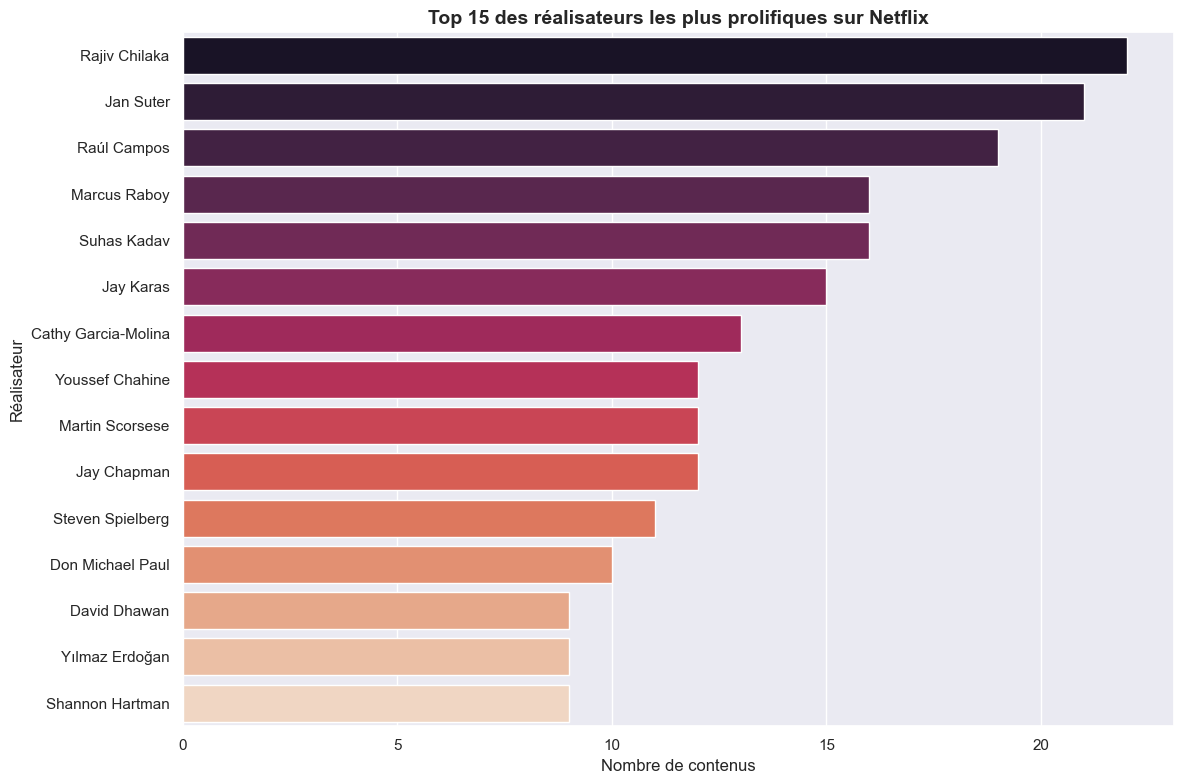

In [42]:
### VISUALISATIONS POUR RÉALISATEURS ET ACTEURS

# 1. Bar plot horizontal - Top 15 réalisateurs (Seaborn)
plt.figure(figsize=(12, 8))
top_15_directors = all_directors.value_counts().head(15)
sns.barplot(x=top_15_directors.values, y=top_15_directors.index, palette='rocket')
plt.xlabel('Nombre de contenus', fontsize=12)
plt.ylabel('Réalisateur', fontsize=12)
plt.title('Top 15 des réalisateurs les plus prolifiques sur Netflix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()




C:\Users\1\AppData\Local\Temp\ipykernel_24676\1248093920.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




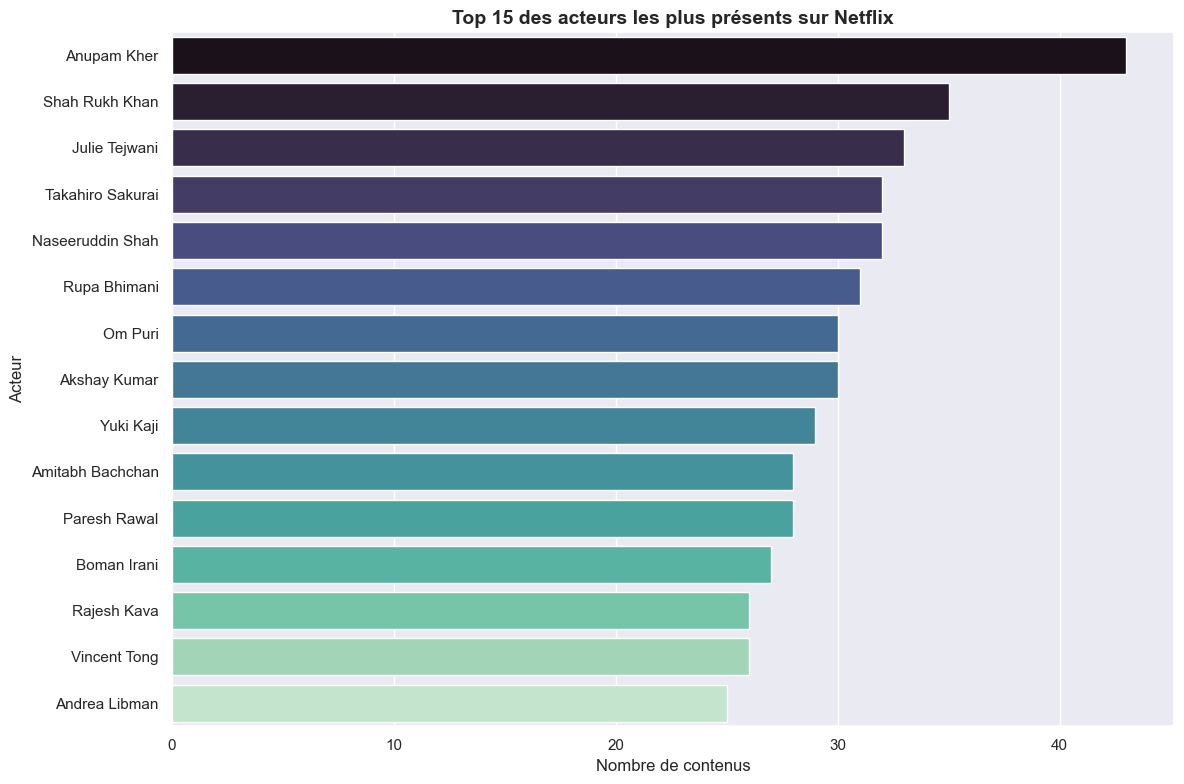

In [43]:
# 2. Bar plot horizontal - Top 15 acteurs (Seaborn)
plt.figure(figsize=(12, 8))
top_15_actors = all_actors.value_counts().head(15)
sns.barplot(x=top_15_actors.values, y=top_15_actors.index, palette='mako')
plt.xlabel('Nombre de contenus', fontsize=12)
plt.ylabel('Acteur', fontsize=12)
plt.title('Top 15 des acteurs les plus présents sur Netflix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

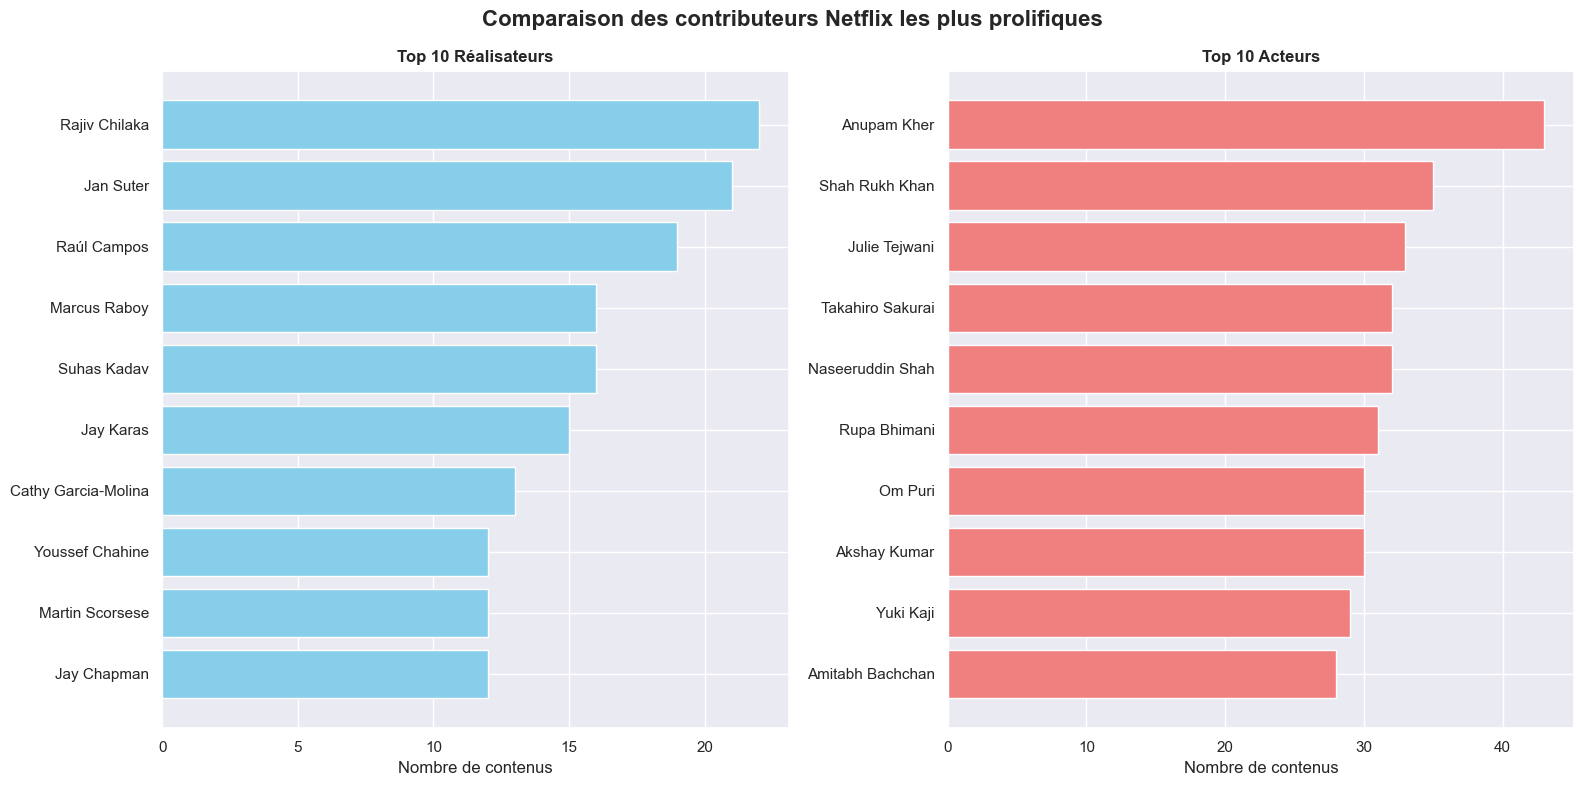

In [44]:
# 3. Comparaison côte à côte - Top 10 réalisateurs vs Top 10 acteurs
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Réalisateurs
top_10_directors = all_directors.value_counts().head(10)
axes[0].barh(range(len(top_10_directors)), top_10_directors.values, color='skyblue')
axes[0].set_yticks(range(len(top_10_directors)))
axes[0].set_yticklabels(top_10_directors.index)
axes[0].set_xlabel('Nombre de contenus')
axes[0].set_title('Top 10 Réalisateurs', fontweight='bold')
axes[0].invert_yaxis()

# Acteurs
top_10_actors = all_actors.value_counts().head(10)
axes[1].barh(range(len(top_10_actors)), top_10_actors.values, color='lightcoral')
axes[1].set_yticks(range(len(top_10_actors)))
axes[1].set_yticklabels(top_10_actors.index)
axes[1].set_xlabel('Nombre de contenus')
axes[1].set_title('Top 10 Acteurs', fontweight='bold')
axes[1].invert_yaxis()

plt.suptitle('Comparaison des contributeurs Netflix les plus prolifiques', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Analyse Temporelle

### Distribution par annee

### Analyse de la colonne date_added.

## Visualistion Interactive

### Représentations obligatoires :

### histogrammes, countplots, boxplots (Seaborn / Matplotlib)
### visualisations interactives (Plotly)

### Histogramme année de sortie des titres

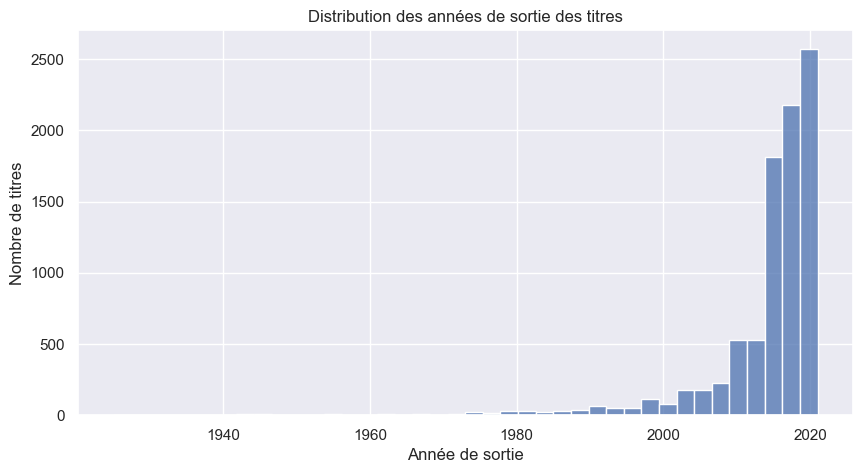

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="release_year", bins=40, kde=False)
plt.title("Distribution des années de sortie des titres")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de titres")
plt.show()

### Boxplots sur la durée (films vs séries)

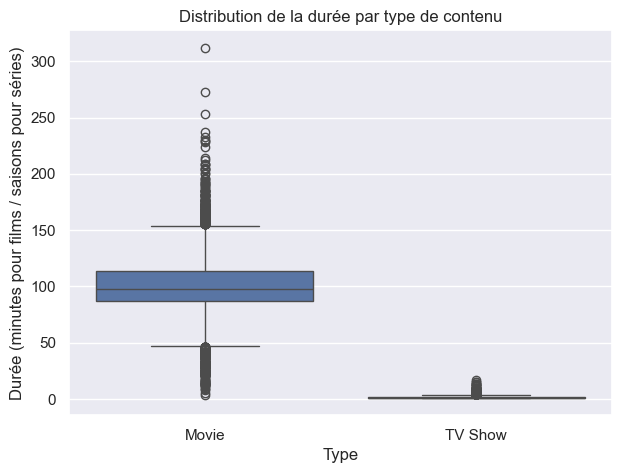

In [58]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df.dropna(subset=["duration_int"]), x="type", y="duration_int")
plt.title("Distribution de la durée par type de contenu")
plt.xlabel("Type")
plt.ylabel("Durée (minutes pour films / saisons pour séries)")
plt.show()

### Visualistation interactive de plotly

In [59]:
#Sur la répartition du contenu
type_counts = (
    df["type"]
    .value_counts()
    .rename_axis("type")       # le nom de l'index devient 'type'
    .reset_index(name="count") # la série devient une colonne 'count'
)

display(type_counts)
print(type_counts.columns)

fig = px.bar(
    type_counts,
    x="type",
    y="count",
    title="Répartition des contenus par type (interactif)",
    text="count"
)
fig.update_traces(textposition="outside")
fig.show()

,type,count
0,Movie,6131
1,TV Show,2676


Index(['type', 'count'], dtype='object')


In [60]:
#Visualisation interactive sur le nombre de titres ajouté par année
added_per_year = (
    df
    .dropna(subset=["year_added"])
    .groupby("year_added")
    .size()
    .reset_index(name="count")
    .sort_values("year_added")
)

fig = px.line(
    added_per_year,
    x="year_added",
    y="count",
    title="Nombre de titres ajoutés par année (interactif)"
)
fig.show()

### plotly pour les grandes famille de genre interactif

In [ ]:
top_genre_groups = (
    df_genres["genre_group"]
    .value_counts()
    .rename_axis("genre_group")
    .reset_index(name="count")
)

fig = px.bar(
    top_genre_groups,
    x="count",
    y="genre_group",
    orientation="h",
    title="Fréquences des grandes familles de genres (interactif)"
)
fig.show()

### Choix libres : nuages de mots, diagrammes circulaires, timelines, etc.

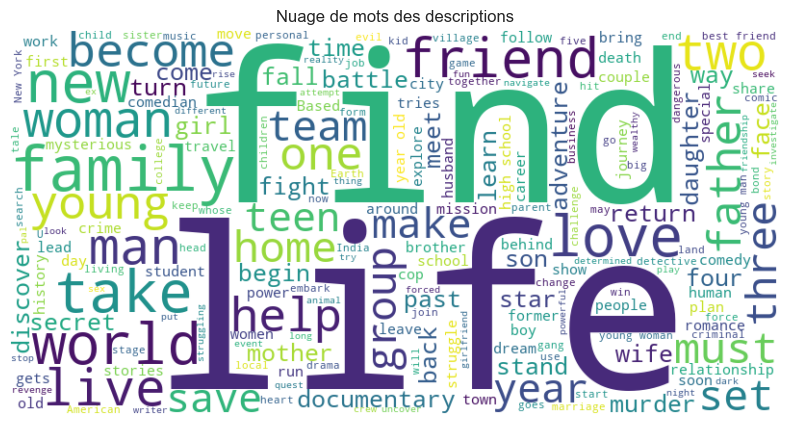

In [61]:
#on va faire un nuage de mots avec les mots de descriptions
text = " ".join(df["description"].dropna().tolist())

stopwords = set(STOPWORDS)
stopwords.update(["film", "series", "netflix","s"])  #mots à ignorer

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=stopwords
).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots des descriptions")
plt.show()

In [62]:
# Configuration
plt.style.use("ggplot")
sns.set_theme()
pd.set_option("display.max_columns", None)

print("=" * 80)
print("Préparation des données")
print("=" * 80)

df_genres_tree = df[["show_id", "type", "listed_in"]].dropna().copy()

print(f"✓ Titres avec genres: {len(df_genres_tree)}")
print()

# Diviser les genres multiples
df_genres_tree["genre"] = df_genres_tree["listed_in"].str.split(", ")
df_genres_tree = df_genres_tree.explode("genre")
df_genres_tree["genre"] = df_genres_tree["genre"].str.strip()

print(f"✓ Genres séparés: {len(df_genres_tree)} associations")
print()

print("=" * 80)
print("Regroupement des genres")
print("=" * 80)

def regrouper_genre(g):
    """Regrouper les genres en catégories principales"""
    g_lower = g.lower()
    
    if "children" in g_lower or "family" in g_lower or "kids" in g_lower:
        return "Enfants/Famille"
    if "comed" in g_lower:
        return "Comédie"
    if "drama" in g_lower:
        return "Drame"
    if "horror" in g_lower:
        return "Horreur"
    if "action" in g_lower or "adventure" in g_lower:
        return "Action/Aventure"
    if "document" in g_lower or "docuseries" in g_lower:
        return "Documentaire"
    if "romantic" in g_lower or "romance" in g_lower:
        return "Romance"
    if "anime" in g_lower:
        return "Anime"
    if "thriller" in g_lower:
        return "Thriller"
    if "reality" in g_lower:
        return "Téléréalité"
    if "stand-up" in g_lower:
        return "Humour/Stand-up"
    
    return "Autre"

df_genres_tree["genre_group"] = df_genres_tree["genre"].apply(regrouper_genre)

print(f"✓ Catégories uniques: {df_genres_tree['genre_group'].nunique()}")
print()

genre_type_counts = (
    df_genres_tree
    .groupby(['type', 'genre_group'])
    .size()
    .reset_index(name='count')
)


heatmap_data = genre_type_counts.pivot(index='genre_group', columns='type', values='count').fillna(0)

print("\n" + "=" * 80)
print("Création de la Heatmap Interactive")
print("=" * 80)

# Créer la heatmap interactive avec Plotly
fig = px.imshow(
    heatmap_data,
    labels=dict(x="Type de contenu", y="Genre", color="Nombre de contenus"),
    x=['Movie', 'TV Show'],
    y=heatmap_data.index,
    color_continuous_scale='Viridis',
    aspect="auto",
    title='Heatmap Interactive: Distribution des genres Netflix par type',
    text_auto=True, 
    height=700,
    width=1000
)

fig.update_layout(
    font=dict(size=12),
    title_font_size=16,
    xaxis_title="Type de contenu",
    yaxis_title="Genre",
    coloraxis_colorbar=dict(title="Nombre de<br>contenus")
)

fig.update_traces(
    text=heatmap_data.values,
    texttemplate='%{text:.0f}',
    textfont={"size": 12}
)

print("✓ Heatmap créée avec succès!")
print()

# Afficher la heatmap
fig.show()


Préparation des données
✓ Titres avec genres: 8807

✓ Genres séparés: 19323 associations

Regroupement des genres
✓ Catégories uniques: 11


Création de la Heatmap Interactive
✓ Heatmap créée avec succès!



## Synthèse


### Résumé des observations principales.

In [ ]:
- Les états unis sont les plus grands producteurs de contenu sur Netflix, suivis par l'Inde et le Royaume-Uni.
- Les films dominent légèrement les séries dans le catalogue Netflix.
- La création de séries a commencé à monter exponentiellement en 2016.
- En ce moment, le temps de contenu total des films est plus que le double des séries, mais ceci va changer drastiquement au cours des prochaines années.
- Les acteurs et réalisateurs qui apparaissent dans le plus de films viennent de l'Inde.
- Outre les films internationaux, les drames et les comédies semblent être les genres les plus souvent regardés.
- Au cours des dernières années, la quantité de productions de séries a très rapidement rattrapé celle des films.

### Tendances remarquables (contenus récents, pays dominants, genres populaires).


In [ ]:
Pays dominants: Les États-Unis produisent le plus de contenus, suivis de l'Inde et du Royaume‑Uni.
Films vs Séries: Les films restent légèrement majoritaires, mais la création de séries augmente rapidement.
Montée des séries (tendance temporelle): Forte augmentation des séries à partir de ~2016, avec une croissance soutenue des ajouts par année.
Durée totale: Le temps cumulé des films est actuellement bien supérieur à celui des séries, mais la tendance suggère un rattrapage par les séries.
Genres les plus fréquents: Drames et comédies dominent; les documentaires, thrillers et contenus internationaux sont aussi significatifs.
Regroupement de genres: Les regroupements montrent des familles principales (Comédie, Drame, Action/Aventure, Documentaire, Romance, Horreur, Anime, etc.), avec une part notable de « Autre ».
Contenu géographique diversifié: Présence croissante de contenus internationaux au-delà des grands producteurs (US/IN/UK).
Contributeurs fréquents: Certains réalisateurs et acteurs (notamment venant d'Inde) réapparaissent souvent dans le catalogue.
Casting / Réalisation: Petit nombre d'acteurs/réalisateurs très prolifiques ; taille moyenne des castings calculée (valeur moyenne disponible dans le notebook).
Genres par type: Distribution différente des genres entre Movie et TV Show (visualisée via heatmaps), indiquant que certains genres sont surreprésentés selon le format.